In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, fashion_mnist # Datasets for demonstration
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
tf.keras.utils.disable_interactive_logging()

In [ ]:
# --- Part 1: Building a Simple Feedforward Neural Network ---

print("--- Part 1: Building a Simple Feedforward Neural Network ---")

# 1. Load and Preprocess Dataset (Using Fashion MNIST for FNN)
# Fashion MNIST is a dataset of Zalando's fashion article images, consisting of 60,000
# training examples and 10,000 test examples. Each example is a 28x28 grayscale image,
# associated with a label from 10 classes.
(x_train_fnn, y_train_fnn), (x_test_fnn, y_test_fnn) = fashion_mnist.load_data()

print(f"\nOriginal FNN training data shape: {x_train_fnn.shape}")
print(f"Original FNN test data shape: {x_test_fnn.shape}")

# Flatten the images: FNNs expect a 1D array of features, so we reshape 28x28 images to 784.
x_train_fnn_flat = x_train_fnn.reshape(-1, 28 * 28)
x_test_fnn_flat = x_test_fnn.reshape(-1, 28 * 28)

# Normalize pixel values to be between 0 and 1. This helps in faster convergence.
x_train_fnn_norm = x_train_fnn_flat / 255.0
x_test_fnn_norm = x_test_fnn_flat / 255.0

print(f"Flattened and Normalized FNN training data shape: {x_train_fnn_norm.shape}")
print(f"Flattened and Normalized FNN test data shape: {x_test_fnn_norm.shape}")

# Convert labels to one-hot encoding for multi-class classification
# Keras expects categorical labels for `sparse_categorical_crossentropy` if not one-hot encoded,
# but for `categorical_crossentropy`, one-hot encoding is required. Let's stick to sparse for simplicity.
# num_classes = 10 # For Fashion MNIST

--- Part 1: Building a Simple Feedforward Neural Network ---

Original FNN training data shape: (60000, 28, 28)
Original FNN test data shape: (10000, 28, 28)
Flattened and Normalized FNN training data shape: (60000, 784)
Flattened and Normalized FNN test data shape: (10000, 784)


In [ ]:
# 2. Build the Feedforward Neural Network Model
model_fnn = keras.Sequential([
    # Input Layer: This implicitly takes the input shape (784,)
    # First Hidden Layer: 128 neurons with ReLU activation. ReLU helps with non-linearity.
    layers.Dense(128, activation='relu', input_shape=(784,)),
    # Dropout Layer: A regularization technique to prevent overfitting. It randomly sets a fraction
    # of input units to 0 at each update during training time, which helps prevent co-adaptation of neurons.
    layers.Dropout(0.2),
    # Second Hidden Layer: 64 neurons with ReLU activation.
    layers.Dense(64, activation='relu'),
    # Output Layer: 10 neurons (one for each class) with Softmax activation.
    # Softmax converts raw scores into probabilities that sum to 1.
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 3. Compile the Model
# Optimizer: Adam is a popular choice for its efficiency.
# Loss Function: sparse_categorical_crossentropy is used when labels are integers (not one-hot encoded).
# Metrics: 'accuracy' to monitor classification performance during training.
model_fnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary to see the layers and parameter counts
print("\n--- FNN Model Summary ---")
model_fnn.summary()


--- FNN Model Summary ---


In [ ]:
# 4. Train the Model
print("\n--- Training FNN Model ---")
history_fnn = model_fnn.fit(x_train_fnn_norm, y_train_fnn, epochs=10,
                            validation_split=0.1, # Use 10% of training data for validation
                            verbose=1)


--- Training FNN Model ---



--- Evaluating FNN Model on Test Data ---
FNN Test Loss: 0.3530
FNN Test Accuracy: 0.8708

--- FNN Classification Report ---
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1000
           1       0.98      0.97      0.98      1000
           2       0.74      0.84      0.79      1000
           3       0.83      0.90      0.86      1000
           4       0.75      0.82      0.79      1000
           5       0.98      0.94      0.96      1000
           6       0.70      0.64      0.67      1000
           7       0.92      0.97      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


--- FNN Confusion Matrix ---


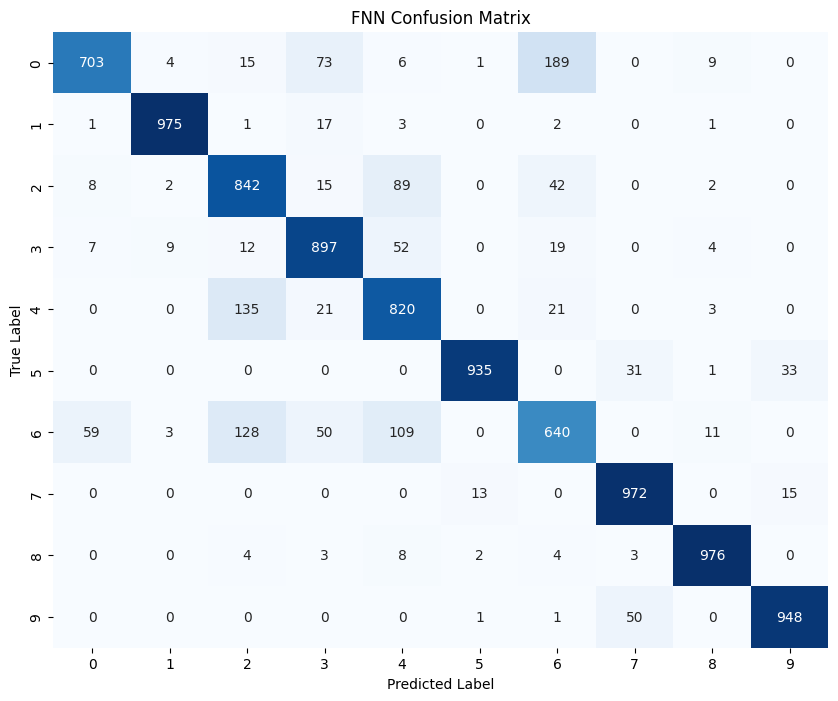

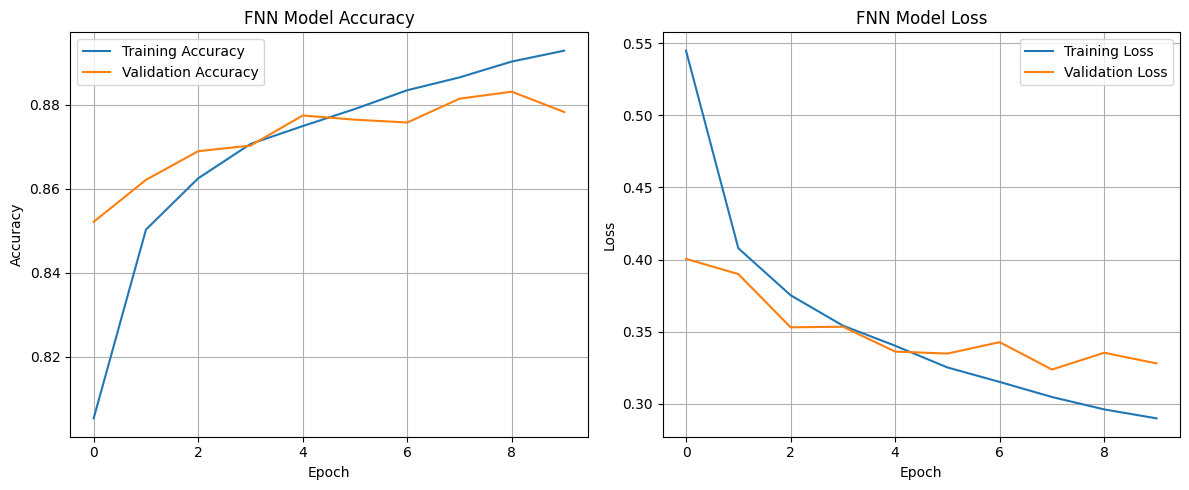

In [ ]:
# 5. Evaluate the Model
print("\n--- Evaluating FNN Model on Test Data ---")
loss_fnn, accuracy_fnn = model_fnn.evaluate(x_test_fnn_norm, y_test_fnn, verbose=0)
print(f"FNN Test Loss: {loss_fnn:.4f}")
print(f"FNN Test Accuracy: {accuracy_fnn:.4f}")

# Generate classification report and confusion matrix
y_pred_fnn = np.argmax(model_fnn.predict(x_test_fnn_norm), axis=-1)
print("\n--- FNN Classification Report ---")
print(classification_report(y_test_fnn, y_pred_fnn))

print("\n--- FNN Confusion Matrix ---")
cm_fnn = confusion_matrix(y_test_fnn, y_pred_fnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("FNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_fnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_fnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('FNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_fnn.history['loss'], label='Training Loss')
plt.plot(history_fnn.history['val_loss'], label='Validation Loss')
plt.title('FNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# --- Part 2: Implementing a Convolutional Neural Network (CNN) for Image Classification ---

print("\n--- Part 2: Implementing a Convolutional Neural Network (CNN) ---")

# 1. Load and Preprocess Dataset (Using MNIST for CNN)
# MNIST is a dataset of handwritten digits, 28x28 grayscale images.
(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = mnist.load_data()

print(f"\nOriginal CNN training data shape: {x_train_cnn.shape}")
print(f"Original CNN test data shape: {x_test_cnn.shape}")

# Reshape data to include channel dimension (for grayscale images, channel=1)
# CNNs expect input in the format (batch_size, height, width, channels)
x_train_cnn = x_train_cnn.reshape(x_train_cnn.shape[0], 28, 28, 1)
x_test_cnn = x_test_cnn.reshape(x_test_cnn.shape[0], 28, 28, 1)

# Normalize pixel values
x_train_cnn = x_train_cnn.astype('float32') / 255.0
x_test_cnn = x_test_cnn.astype('float32') / 255.0

print(f"Reshaped and Normalized CNN training data shape: {x_train_cnn.shape}")
print(f"Reshaped and Normalized CNN test data shape: {x_test_cnn.shape}")

# Number of classes for MNIST (digits 0-9)
num_classes_cnn = 10


--- Part 2: Implementing a Convolutional Neural Network (CNN) ---

Original CNN training data shape: (60000, 28, 28)
Original CNN test data shape: (10000, 28, 28)
Reshaped and Normalized CNN training data shape: (60000, 28, 28, 1)
Reshaped and Normalized CNN test data shape: (10000, 28, 28, 1)


In [ ]:
# 2. Build the Convolutional Neural Network Model
model_cnn = keras.Sequential([
    # Convolutional Layer 1: 32 filters, each 3x3.
    # 'relu' activation and 'input_shape' for the first layer (28x28 grayscale image).
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1: Reduces the spatial dimensions (e.g., from 26x26 to 13x13).
    # This helps reduce computational cost and introduces translational invariance.
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2: 64 filters, each 3x3.
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Max Pooling Layer 2: Further reduces dimensions.
    layers.MaxPooling2D((2, 2)),

    # Flatten Layer: Converts the 2D feature maps into a 1D vector.
    # This is necessary to feed the output of convolutional layers into fully connected layers.
    layers.Flatten(),

    # Fully Connected Layer 1 (Dense): 128 neurons with 'relu' activation.
    layers.Dense(128, activation='relu'),
    # Dropout Layer: Helps prevent overfitting by randomly setting a fraction of inputs to zero.
    layers.Dropout(0.5), # Higher dropout for CNNs is common

    # Output Layer: 10 neurons (for 10 digit classes) with 'softmax' activation
    # to output class probabilities.
    layers.Dense(num_classes_cnn, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 3. Compile the Model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Labels are integers
                  metrics=['accuracy'])

# Print model summary
print("\n--- CNN Model Summary ---")
model_cnn.summary()


--- CNN Model Summary ---


In [ ]:
# 4. Train the Model
print("\n--- Training CNN Model ---")
history_cnn = model_cnn.fit(x_train_cnn, y_train_cnn, epochs=10,
                            validation_split=0.1, # Use 10% of training data for validation
                            verbose=1)


--- Training CNN Model ---



--- Evaluating CNN Model on Test Data ---
CNN Test Loss: 0.0282
CNN Test Accuracy: 0.9922

--- CNN Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


--- CNN Confusion Matrix ---


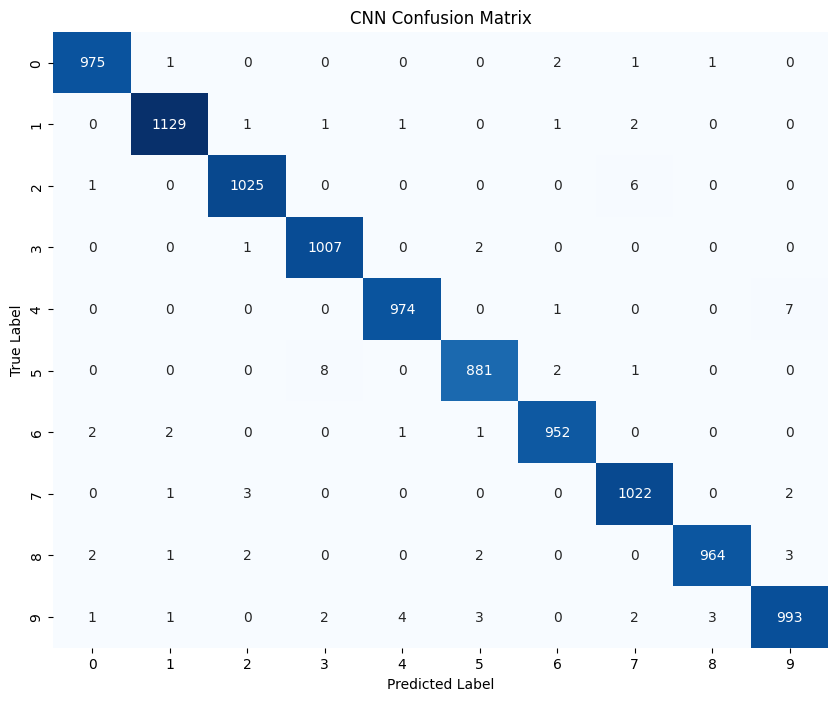

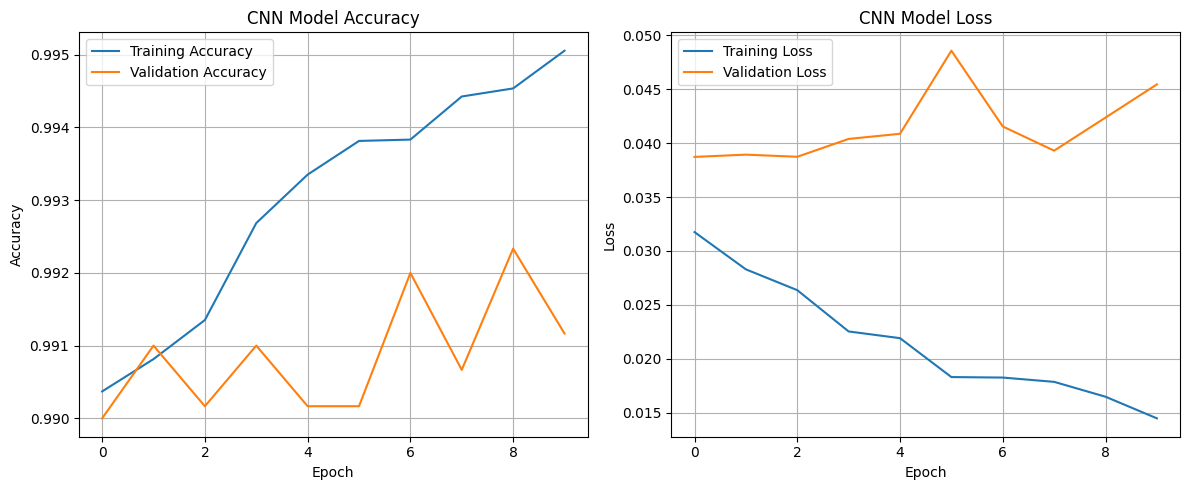

In [ ]:
# 5. Evaluate the Model
print("\n--- Evaluating CNN Model on Test Data ---")
loss_cnn, accuracy_cnn = model_cnn.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print(f"CNN Test Loss: {loss_cnn:.4f}")
print(f"CNN Test Accuracy: {accuracy_cnn:.4f}")

# Generate classification report and confusion matrix
y_pred_cnn = np.argmax(model_cnn.predict(x_test_cnn), axis=-1)
print("\n--- CNN Classification Report ---")
print(classification_report(y_test_cnn, y_pred_cnn))

print("\n--- CNN Confusion Matrix ---")
cm_cnn = confusion_matrix(y_test_cnn, y_pred_cnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


--- Sample CNN Predictions ---


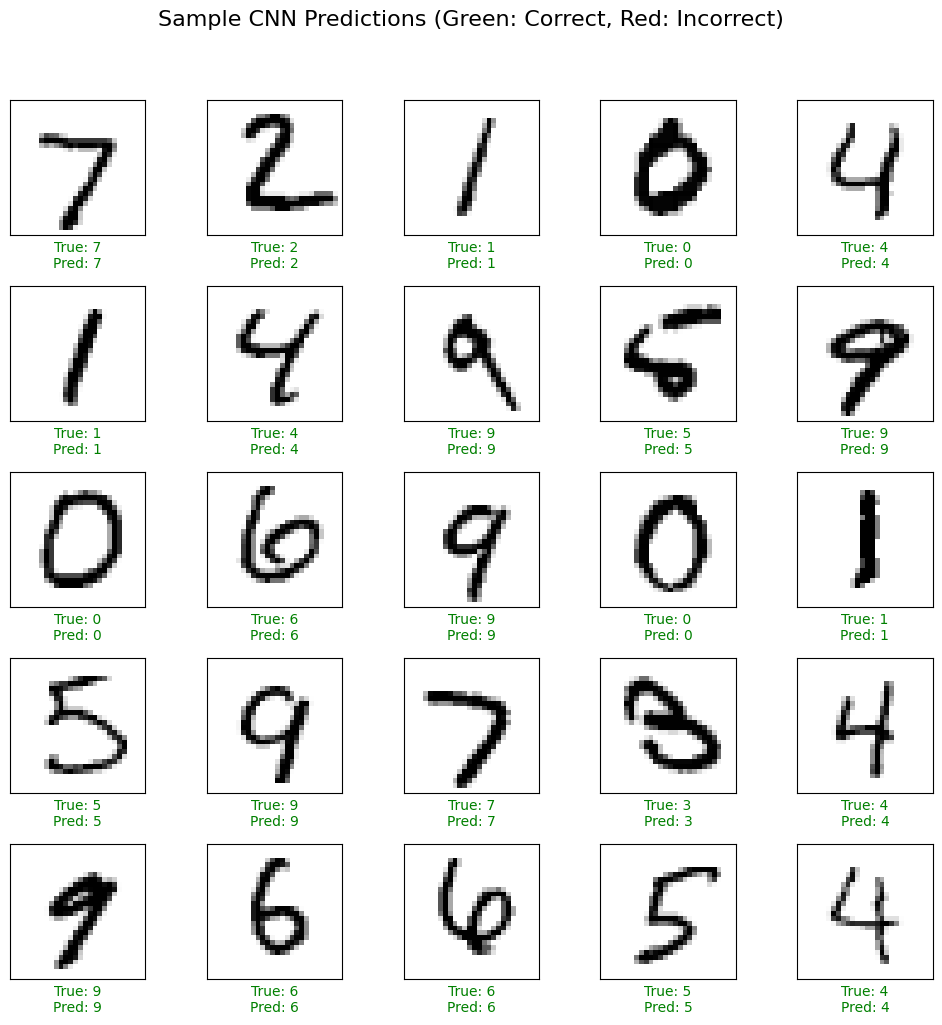

In [ ]:
# Optional: Visualize a few predictions
print("\n--- Sample CNN Predictions ---")
class_names_mnist = [str(i) for i in range(10)] # Labels 0-9

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_cnn[i].reshape(28, 28), cmap=plt.cm.binary)
    true_label = y_test_cnn[i]
    predicted_label = y_pred_cnn[i]
    color = 'green' if true_label == predicted_label else 'red'
    plt.xlabel(f"True: {class_names_mnist[true_label]}\nPred: {class_names_mnist[predicted_label]}", color=color)
plt.suptitle("Sample CNN Predictions (Green: Correct, Red: Incorrect)", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()